<a href="https://colab.research.google.com/github/Atharva-Garud/DEC_Lab/blob/main/PD25_DEC_lab_7_DT_salaries_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree on salaries.csv**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import graphviz
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt



---



**Loading the Dataset**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving salaries.csv to salaries.csv


In [18]:
data = pd.read_csv('salaries.csv')

print("Dataset:")
data

Dataset:


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1




---



**Splitting Dataset**

In [19]:
selected_features = ['company', 'job', 'degree', 'salary_more_then_100k']

X = data[selected_features]
y = data['job']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




---



**Plotting the Confusion Matrix**

In [20]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



---



**Evaluating Performance Metrics**

In [21]:
def print_results(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n{title} Results:")
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)
    print('Classification Report:\n', classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test, title)
    return f1



---



**Applying Classification Techniques**


Decision Tree Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
                      precision    recall  f1-score   support

computer programmer       1.00      1.00      1.00         2
    sales executive       1.00      1.00      1.00         2

           accuracy                           1.00         4
          macro avg       1.00      1.00      1.00         4
       weighted avg       1.00      1.00      1.00         4



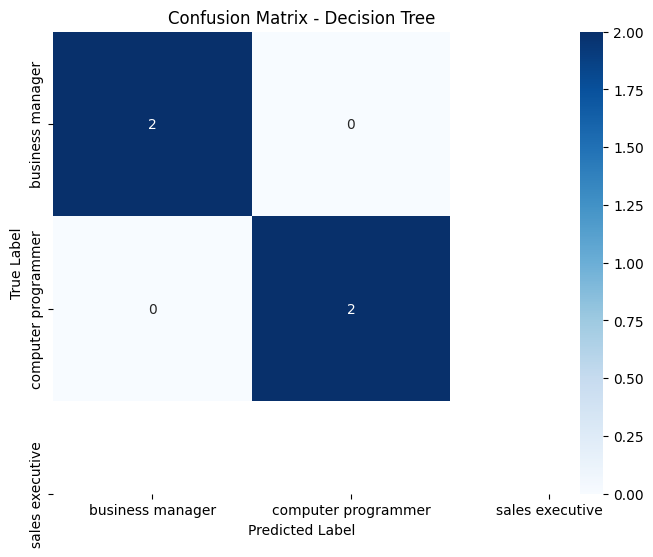

In [22]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
f1_tree = print_results(tree_model, X_test, y_test, 'Decision Tree')



Random Forest Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
                      precision    recall  f1-score   support

computer programmer       1.00      1.00      1.00         2
    sales executive       1.00      1.00      1.00         2

           accuracy                           1.00         4
          macro avg       1.00      1.00      1.00         4
       weighted avg       1.00      1.00      1.00         4



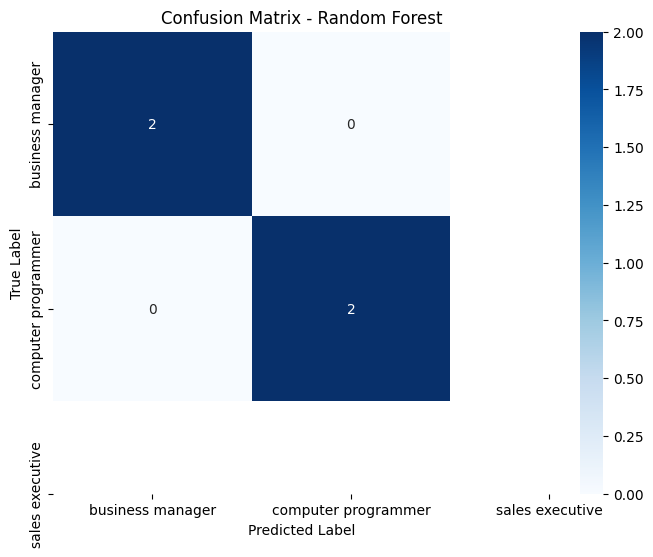

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
f1_rf = print_results(rf_model, X_test, y_test, 'Random Forest')


Gradient Boosting Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
                      precision    recall  f1-score   support

computer programmer       1.00      1.00      1.00         2
    sales executive       1.00      1.00      1.00         2

           accuracy                           1.00         4
          macro avg       1.00      1.00      1.00         4
       weighted avg       1.00      1.00      1.00         4



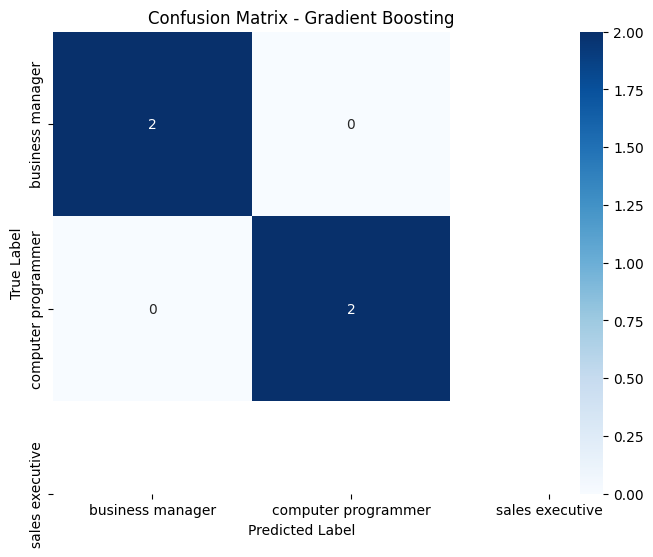

In [24]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
f1_gb = print_results(gb_model, X_test, y_test, 'Gradient Boosting')


SVM Results:
Accuracy: 0.75
F1 Score: 0.8333333333333333
Classification Report:
                      precision    recall  f1-score   support

   business manager       0.00      0.00      0.00         0
computer programmer       1.00      1.00      1.00         2
    sales executive       1.00      0.50      0.67         2

           accuracy                           0.75         4
          macro avg       0.67      0.50      0.56         4
       weighted avg       1.00      0.75      0.83         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


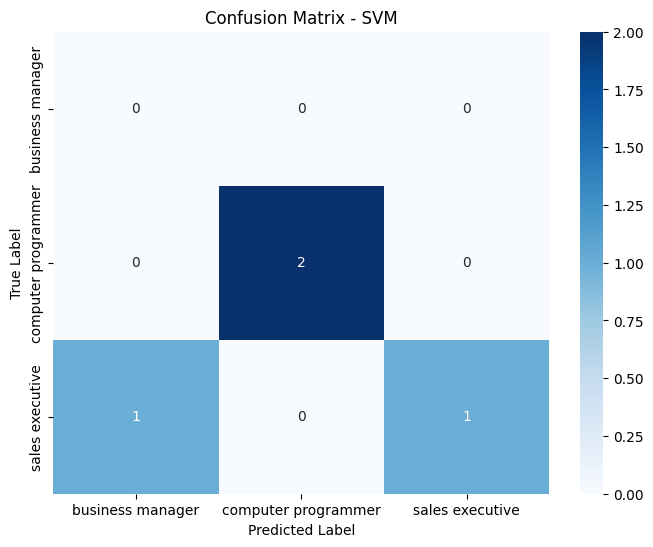

In [25]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
f1_svm = print_results(svm_model, X_test, y_test, 'SVM')


KNN Results:
Accuracy: 0.25
F1 Score: 0.3333333333333333
Classification Report:
                      precision    recall  f1-score   support

   business manager       0.00      0.00      0.00         0
computer programmer       1.00      0.50      0.67         2
    sales executive       0.00      0.00      0.00         2

           accuracy                           0.25         4
          macro avg       0.33      0.17      0.22         4
       weighted avg       0.50      0.25      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

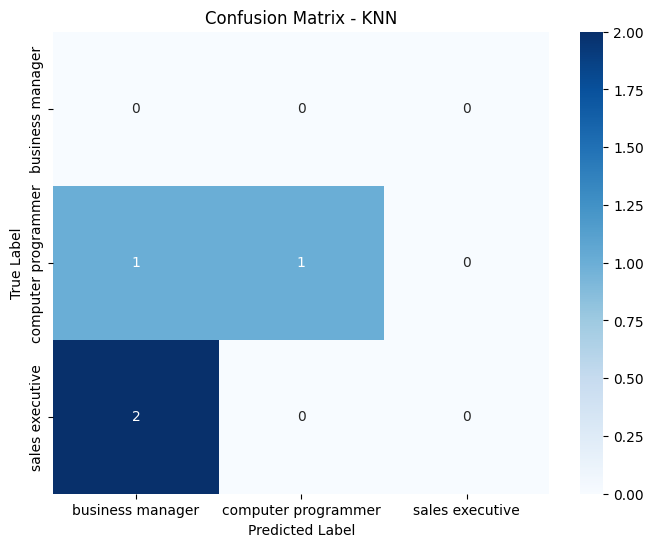

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
f1_knn = print_results(knn_model, X_test, y_test, 'KNN')


Logistic Regression Results:
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
                      precision    recall  f1-score   support

computer programmer       1.00      1.00      1.00         2
    sales executive       1.00      1.00      1.00         2

           accuracy                           1.00         4
          macro avg       1.00      1.00      1.00         4
       weighted avg       1.00      1.00      1.00         4



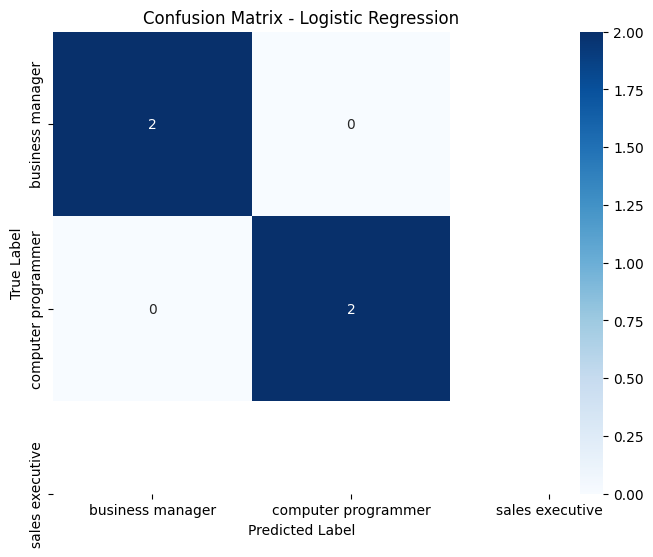

In [27]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
f1_logreg = print_results(logreg_model, X_test, y_test, 'Logistic Regression')



---



**F1 scores for comparison**

In [28]:
print("\nF1 Scores:")
print(f"Decision Tree: {f1_tree}")
print(f"Random Forest: {f1_rf}")
print(f"Gradient Boosting: {f1_gb}")
print(f"SVM: {f1_svm}")
print(f"KNN: {f1_knn}")
print(f"Logistic Regression: {f1_logreg}")


F1 Scores:
Decision Tree: 1.0
Random Forest: 1.0
Gradient Boosting: 1.0
SVM: 0.8333333333333333
KNN: 0.3333333333333333
Logistic Regression: 1.0




---



---

